RGB
('R', 'G', 'B')
(225, 225, 3)
(225, 225, 3)


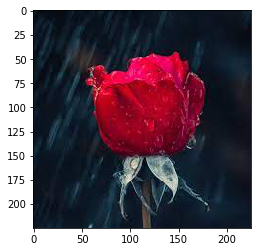

In [12]:
%matplotlib inline
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np
import scipy.ndimage.filters
from matplotlib import pyplot as plt
from matplotlib import colors
from skimage.color import rgb2lab, lab2rgb

im = Image.open('../../sample_data/1024x768/test_images/5076506.jpg')
print(im.mode)
print(im.getbands())
m = np.array(im)
print (m.shape)
#m = np.delete(m,0, 2)
#m = np.delete(m,1, 2)
print (m.shape)
h = m.shape[0]
w = m.shape[1]
#m = m.reshape(w,h)

plt.imshow(m, cmap='gray', vmin=0, vmax=255)

In [13]:
labimage = rgb2lab(m)

95.88064718631517 0.09893413517270844


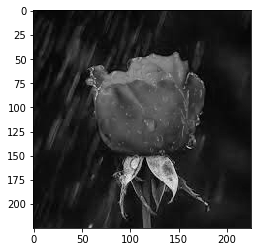

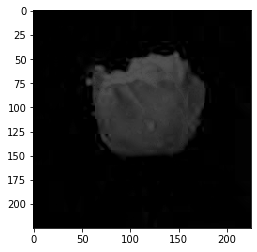

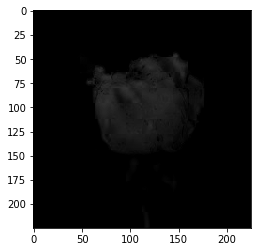

In [14]:

lum = labimage[:,:,0]
a = labimage[:,:,1]
b = labimage[:,:,2]
fLum = lum.flatten()
print (max(fLum), min(fLum))
plt.figure()
plt.imshow(lum * 2.55, cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(a, cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(b, cmap='gray', vmin=0, vmax=255)

In [15]:
greyimage = np.copy(labimage)
greyimage[...,1] = greyimage[...,2] = 0
greyimage = lab2rgb(greyimage)


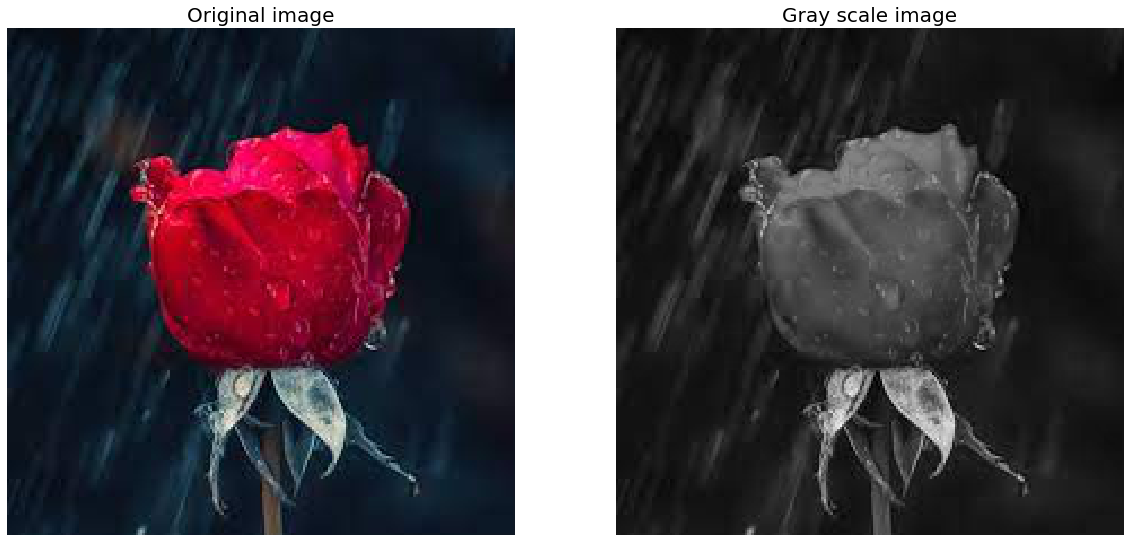

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(121), plt.imshow(m), plt.axis('off'), plt.title('Original image', size=20)
plt.subplot(122), plt.imshow(greyimage), plt.axis('off'), plt.title('Gray scale image', size=20)
plt.show()

In [17]:
maxL = max(fLum)
minL = min(fLum)
averageL = np.average(fLum)

ratio = minL / maxL
ratio


0.0010318467602795768

In [18]:
def min_range98(v):
    w = len(v)
    sumByPos = np.zeros(w)
    resRange = []
    for i in range(w):
        resRange.append(w+1)
        for j in range(i,w):
            sumByPos[i] += v[j]
            if sumByPos[i] > 0.98:
                resRange[i] = j -i
                break
    x = min(resRange)

    return x

In [19]:
r = m[:,:,0]
g = m[:,:,1]
b = m[:,:,2]
histR = np.histogram(r,bins = range(256))
histG = np.histogram(g,bins = range(256))
histB = np.histogram(b,bins = range(256))


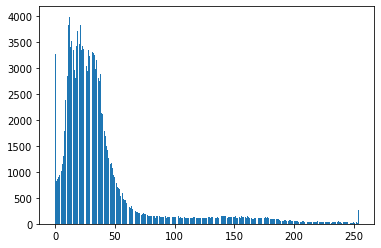

In [20]:
sumHist = histR[0] + histG[0] + histB[0]

plt.bar( np.arange(len(sumHist)),sumHist)
plt.show()


In [21]:
histWidth = min_range98(sumHist/sumHist.sum())
f = histWidth/256

In [22]:
print ("Max Luminance:", maxL)
print ("Min Luminance:", minL)
print ("Average Luminance:", averageL)
print ("Contrast Ratio:", ratio)
print ("Histogram Width:", f)

Max Luminance: 95.88064718631517
Min Luminance: 0.09893413517270844
Average Luminance: 15.750432115901276
Contrast Ratio: 0.0010318467602795768
Histogram Width: 0.72265625
